# A class to manipulate the CRUST1.0 model

This notebook shows how  to use the `Crust1` class to manipulate the [CRUST1.0 model](http://igppweb.ucsd.edu/~gabi/crust1.html). The class is defined in the [`crust1.py`](crust1.py) file.

## Load the model and make some plots

In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from fatiando.vis import mpl, myv
from fatiando import gridder
from IPython.display import Image
from crust1 import fetch_crust1

In [2]:
data = fetch_crust1('../data/crust1.0.tar.gz')

In [3]:
data.layers

['water',
 'ice',
 'upper_sediments',
 'middle_sediments',
 'lower_sediments',
 'upper_crust',
 'middle_crust',
 'lower_crust',
 'mantle']

In [4]:
data.water.density

array([[ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       ..., 
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.]])

In [5]:
data.upper_crust.vp

array([[ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       [ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       [ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       ..., 
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.],
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.],
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.]])

In [6]:
# Mean crustal density
data.density[5:8].mean(0)

array([[ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       [ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       [ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       ..., 
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667],
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667],
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667]])

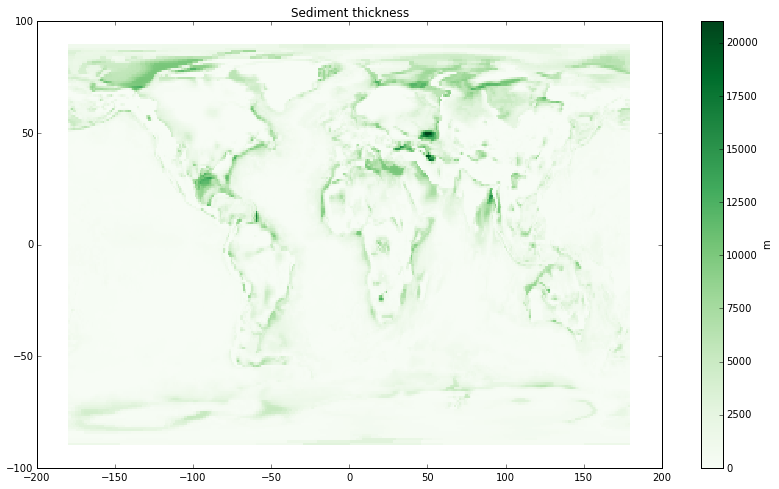

In [7]:
plt.figure(figsize=(14, 8))
plt.title('Sediment thickness')
plt.pcolormesh(data.lons, data.lats, data.sediment_thickness, cmap=plt.cm.Greens)
plt.colorbar().set_label('m')

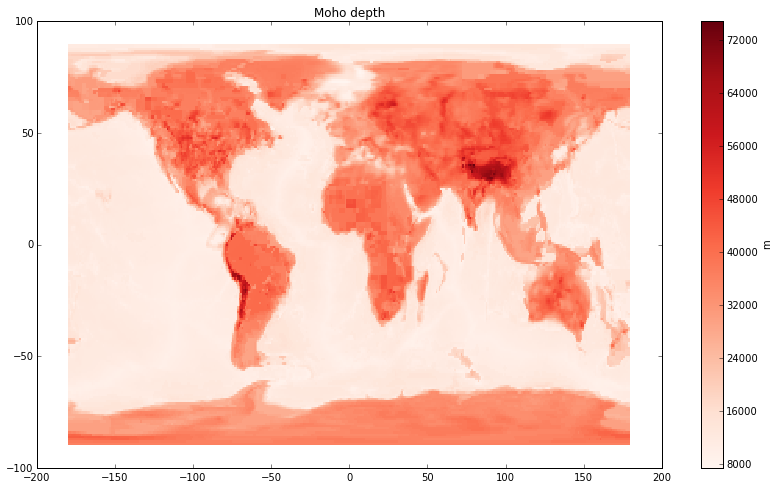

In [8]:
plt.figure(figsize=(14, 8))
plt.title('Moho depth')
plt.pcolormesh(data.lons, data.lats, data.moho_depth, cmap=plt.cm.Reds)
plt.colorbar().set_label('m')

## Cut the model

In [9]:
sa = data.cut((-90, -30, -65, 20))

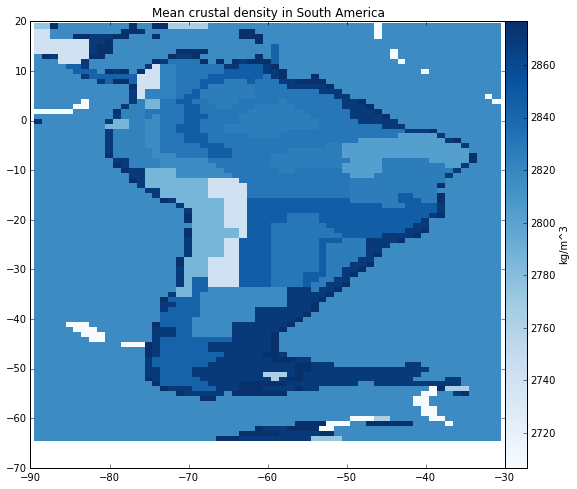

In [10]:
plt.figure(figsize=(10, 8))
plt.title('Mean crustal density in South America')
plt.pcolormesh(sa.lons, sa.lats, sa.density[5:8].mean(0), cmap=plt.cm.Blues)
plt.colorbar(pad=0).set_label('kg/m^3')